# <a id="id1"><center>Module 6 - Clustering for Diverse portfolio analysis</center></a>

## <a id="id1" style="color:#FF0000;">Clustering for Diversification analysis</a>
Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields.

Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features.

In financial Markets, Cluster analysis is a technique used to group sets of objects that share similar characteristics. It is common in statistics, but investors will use the approach to build a diversified portfolio. Stocks that exhibit high correlations in returns fall into one basket, those slightly less correlated in another, and so on, until each stock is placed into a category.

## <a id="id1">Problem Statement 6.1</a>
Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps

**Name of 30 stock which used in this module** (CSV Files in `30_Stock_files`)

'APOLLOTYRE.csv', 'ASHOKA.csv', 'ASIANPAINT.csv', 'BAJAJELEC.csv', 'BAJFINANCE.csv', 'CENTURYPLY.csv', 'DHFL.csv', 'HDFCBANK.csv', 'HEROMOTOCO.csv', 'HINDUNILVR.csv', 'IDBI.csv', 'INFY.csv', 'JETAIRWAYS.csv', 'LT.csv', 'LUXIND.csv', 'MARUTI.csv', 'MINDTREE.csv', 'NBCC.csv', 'PNB.csv', 'PVR.csv', 'RAYMOND.csv', 'RBLBANK.csv', 'RCOM.csv', 'RELIANCE.csv', 'SONATSOFTW.csv', 'SUNTV.csv', 'TATAPOWER.csv', 'TCS.csv', 'VENKEYS.csv', 'VOLTAS.csv'

In [1]:
import pandas as pd
close_price_30 = pd.DataFrame([])

In [2]:
import os
# Iterate over all 30 stocks
for i in os.listdir("./30_Stock_files/"):
    current_df = pd.read_csv("./30_Stock_files/"+str(i))
    # Take rows only with Series 'EQ'
    current_df = current_df[current_df.Series == 'EQ'].reset_index(drop=True)
    # Take Closing Price column from each stock
    close_price_30[current_df.Symbol[0]] = current_df["Close Price"]
print(f"Shape of close_price_30 : {close_price_30.shape[0]} Rows & {close_price_30.shape[1]} Columns")
close_price_30.head()

Shape of close_price_30 : 494 Rows & 30 Columns


,APOLLOTYRE,ASHOKA,ASIANPAINT,BAJAJELEC,BAJFINANCE,CENTURYPLY,DHFL,HDFCBANK,HEROMOTOCO,HINDUNILVR,...,RAYMOND,RBLBANK,RCOM,RELIANCE,SONATSOFTW,SUNTV,TATAPOWER,TCS,VENKEYS,VOLTAS
0,231.90,216.05,1148.05,341.15,1332.95,266.65,431.40,1553.40,3515.45,983.25,...,772.80,563.90,32.00,1344.10,162.65,912.20,83.55,2365.10,1169.70,431.85
1,234.40,214.90,1142.85,347.00,1347.75,266.10,424.45,1559.65,3619.40,1000.40,...,785.00,562.60,32.10,1356.30,158.60,894.70,83.85,2429.15,1177.00,432.45
2,237.35,217.00,1154.95,349.85,1324.80,264.85,429.00,1557.15,3645.95,1009.40,...,783.65,564.25,31.95,1353.10,158.25,887.05,85.35,2455.35,1188.00,430.20
3,232.65,209.65,1151.35,334.10,1314.55,260.35,417.95,1557.10,3592.05,990.25,...,746.95,552.15,31.05,1327.35,157.40,871.35,83.75,2536.20,1156.90,414.10
4,234.65,206.25,1123.15,336.20,1289.15,254.05,404.20,1561.25,3571.65,1008.00,...,723.10,555.45,30.55,1318.85,151.90,852.40,84.15,2507.15,1161.65,415.75


## <a id="id2">Problem Statement 6.2</a>
Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [3]:
one_yr_clse_prc = close_price_30.tail(252).reset_index(drop=True)
one_yr_clse_prc.tail()

,APOLLOTYRE,ASHOKA,ASIANPAINT,BAJAJELEC,BAJFINANCE,CENTURYPLY,DHFL,HDFCBANK,HEROMOTOCO,HINDUNILVR,...,RAYMOND,RBLBANK,RCOM,RELIANCE,SONATSOFTW,SUNTV,TATAPOWER,TCS,VENKEYS,VOLTAS
247,195.20,118.10,1387.80,557.75,3017.05,163.15,116.60,2322.35,2527.35,1697.50,...,808.95,665.95,2.1,1343.50,340.50,551.10,64.35,2151.95,2000.45,601.45
248,191.75,115.45,1385.70,534.45,2921.30,161.30,116.30,2307.25,2499.70,1688.70,...,807.10,652.80,2.2,1299.45,338.10,528.90,64.50,2152.85,1956.70,576.65
249,185.30,115.30,1354.20,531.85,2971.35,160.50,116.00,2290.90,2537.75,1703.75,...,805.30,661.85,2.3,1256.45,332.95,540.70,64.40,2172.55,1930.10,574.10
250,190.95,117.45,1341.05,540.90,2922.85,160.50,116.40,2296.50,2507.30,1687.45,...,804.40,675.00,2.4,1251.15,332.85,541.15,63.80,2135.80,1820.65,580.05
251,186.20,117.15,1332.50,541.55,2931.85,162.85,110.95,2287.20,2510.75,1702.00,...,779.35,659.50,2.3,1232.05,339.80,535.65,62.60,2128.75,1706.75,572.20


In [4]:
daily_perc_return = one_yr_clse_prc.pct_change(fill_method='ffill').dropna()*100

In [5]:
daily_perc_return.head()

,APOLLOTYRE,ASHOKA,ASIANPAINT,BAJAJELEC,BAJFINANCE,CENTURYPLY,DHFL,HDFCBANK,HEROMOTOCO,HINDUNILVR,...,RAYMOND,RBLBANK,RCOM,RELIANCE,SONATSOFTW,SUNTV,TATAPOWER,TCS,VENKEYS,VOLTAS
1,2.600803,0.159915,2.083246,4.084032,2.048563,0.537372,-0.023899,-0.558210,-0.319694,2.301598,...,1.992786,0.114602,1.302932,1.787305,0.504901,2.275622,-0.409596,-1.718021,-3.886436,2.098755
2,-1.633209,-0.106440,-0.440239,1.009188,-1.427102,-0.178167,-0.725100,-0.523415,0.253560,-0.123506,...,-1.281938,-0.953925,-2.572347,-0.401648,5.969267,-1.019079,-0.998825,0.591941,1.815202,-1.171221
3,-0.864753,-3.125555,1.045541,-1.625410,-1.032969,-1.168262,0.353158,0.577006,-0.079293,-0.003342,...,0.094035,-0.780121,-0.660066,0.992658,1.728946,-0.469027,-1.068249,1.397768,0.320526,-0.870687
4,-1.046755,-0.164986,-0.396712,-3.653176,-0.632740,0.853719,-0.207950,0.722806,-0.229860,-0.635027,...,-2.787098,0.815376,-7.308970,0.455616,-2.617873,-1.706798,-1.619676,-1.090477,-1.401421,-2.090111
5,-1.269394,-0.367242,5.645890,-1.699182,1.311636,-0.325574,0.280516,0.955989,-0.759737,1.183989,...,1.214910,-0.173310,-1.792115,0.825562,-0.450387,1.555192,-0.121951,0.165158,-2.531153,2.666334


In [6]:
daily_perc_return.tail()

,APOLLOTYRE,ASHOKA,ASIANPAINT,BAJAJELEC,BAJFINANCE,CENTURYPLY,DHFL,HDFCBANK,HEROMOTOCO,HINDUNILVR,...,RAYMOND,RBLBANK,RCOM,RELIANCE,SONATSOFTW,SUNTV,TATAPOWER,TCS,VENKEYS,VOLTAS
247,-0.938848,1.766480,-1.769536,-0.017926,-0.568500,-3.432968,-12.297856,-0.261977,-0.156046,1.713704,...,0.359779,0.286123,5.000000,-2.989386,3.228740,-0.352590,-2.277904,-0.273420,-0.717157,-0.759013
248,-1.767418,-2.243861,-0.151319,-4.177499,-3.173630,-1.133926,-0.257290,-0.650203,-1.094031,-0.518409,...,-0.228692,-1.974623,4.761905,-3.278750,-0.704846,-4.028307,0.233100,0.041823,-2.187008,-4.123369
249,-3.363755,-0.129926,-2.273219,-0.486481,1.713278,-0.495970,-0.257954,-0.708636,1.522183,0.891218,...,-0.223021,1.386336,4.545455,-3.309092,-1.523218,2.231046,-0.155039,0.915066,-1.359432,-0.442209
250,3.049110,1.864701,-0.971053,1.701608,-1.632255,0.000000,0.344828,0.244445,-1.199882,-0.956713,...,-0.111760,1.986855,4.347826,-0.421823,-0.030035,0.083225,-0.931677,-1.691561,-5.670691,1.036405
251,-2.487562,-0.255428,-0.637560,0.120170,0.307919,1.464174,-4.682131,-0.404964,0.137598,0.862248,...,-3.114122,-2.296296,-4.166667,-1.526596,2.088028,-1.016354,-1.880878,-0.330087,-6.256007,-1.353332


#### Average Annual Percentage Return

In [7]:
annual_perc_return = daily_perc_return.mean()
annual_perc_return.head()

APOLLOTYRE   -0.152627
ASHOKA       -0.291083
ASIANPAINT    0.055553
BAJAJELEC    -0.037507
BAJFINANCE    0.206037
dtype: float64

#### Annual Percentage Volatility

In [8]:
annual_volatility = daily_perc_return.std()
annual_volatility.head()

APOLLOTYRE    1.946514
ASHOKA        3.242312
ASIANPAINT    1.463245
BAJAJELEC     2.367102
BAJFINANCE    2.206760
dtype: float64

## <a id="id3">Problem Statement 6.3</a>
Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

In [9]:
# Dataframe with column annual returns and annual volatilities
clustering_data = pd.DataFrame({'Returns':annual_perc_return, 'Volatilities':annual_volatility})

In [11]:
clustering_data.head()

,Returns,Volatilities
APOLLOTYRE,-0.152627,1.946514
ASHOKA,-0.291083,3.242312
ASIANPAINT,0.055553,1.463245
BAJAJELEC,-0.037507,2.367102
BAJFINANCE,0.206037,2.206760


#### Elbow Curve Method Procedure

In [12]:
from sklearn.cluster import KMeans

# define how many cluster we want to test
cluster_num = 8

# define the dataframe that will contains all our relevant information for each cluster size.
diff_cluster_result = pd.DataFrame(index=pd.np.arange(2,cluster_num+1), 
                                   columns=['loss', 'score','center_returns', 'center_volatility', 'cluster_label', 'model'])

for k in range(2, cluster_num+1):
    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(clustering_data)
    
    # Inertia/Loss/Distortion: Sum of distances of samples to their closest cluster center.
    diff_cluster_result['loss'][k] = kmeans.inertia_
    diff_cluster_result['center_returns'][k] = kmeans.cluster_centers_[:,0]
    diff_cluster_result['center_volatility'][k] = kmeans.cluster_centers_[:,1]
    diff_cluster_result['cluster_label'][k] = kmeans.labels_.astype(float)
    diff_cluster_result['score'][k] = kmeans.score
    diff_cluster_result['model'][k] = kmeans

C:\Users\Shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  import sys


In [15]:
diff_cluster_result

,loss,score,center_returns,center_volatility,cluster_label,model
2,14.1272,<bound method KMeans.score of KMeans(algorithm...,"[-0.055401346477472746, -0.43032160827718646]","[2.1942635565287127, 5.093217543771512]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","KMeans(algorithm='auto', copy_x=True, init='k-..."
3,6.46239,<bound method KMeans.score of KMeans(algorithm...,"[-0.14580511199952417, -0.004859592436745538, ...","[2.891957485711938, 1.8131674346705733, 5.5338...","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 1.0, ...","KMeans(algorithm='auto', copy_x=True, init='k-..."
4,3.43711,<bound method KMeans.score of KMeans(algorithm...,"[-0.18754356398306637, -0.07224520722302817, 0...","[3.488575627263906, 2.37814372060253, 1.595204...","[2.0, 0.0, 2.0, 1.0, 1.0, 1.0, 3.0, 2.0, 2.0, ...","KMeans(algorithm='auto', copy_x=True, init='k-..."
5,2.09273,<bound method KMeans.score of KMeans(algorithm...,"[-0.4642992912958705, 0.0007752238848937609, -...","[5.0613768253692175, 1.5952040420671971, 2.378...","[1.0, 4.0, 1.0, 2.0, 2.0, 2.0, 0.0, 1.0, 1.0, ...","KMeans(algorithm='auto', copy_x=True, init='k-..."
6,1.27649,<bound method KMeans.score of KMeans(algorithm...,"[-0.4642992912958705, -0.004318697721311313, -...","[5.0613768253692175, 1.9321546010285822, 2.489...","[1.0, 4.0, 5.0, 2.0, 1.0, 2.0, 0.0, 5.0, 1.0, ...","KMeans(algorithm='auto', copy_x=True, init='k-..."
7,0.931953,<bound method KMeans.score of KMeans(algorithm...,"[-0.4642992912958705, -0.02851921866624764, -0...","[5.0613768253692175, 1.801910990283273, 2.5816...","[1.0, 4.0, 5.0, 6.0, 6.0, 2.0, 0.0, 5.0, 1.0, ...","KMeans(algorithm='auto', copy_x=True, init='k-..."
8,0.735764,<bound method KMeans.score of KMeans(algorithm...,"[-0.40247903343140434, -0.02851921866624764, -...","[4.75433851351132, 1.801910990283273, 2.581687...","[1.0, 4.0, 5.0, 6.0, 6.0, 2.0, 7.0, 5.0, 1.0, ...","KMeans(algorithm='auto', copy_x=True, init='k-..."


### Elbow Curve Graph

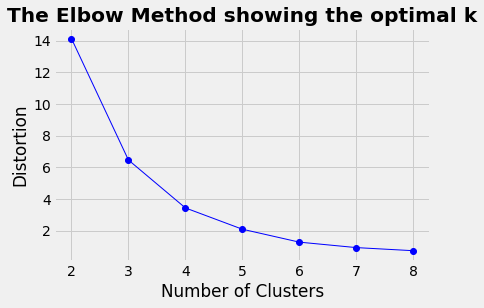

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
with plt.style.context('fivethirtyeight'):
    plt.plot(diff_cluster_result.index.values, diff_cluster_result.loss, 'bo-', linewidth=1)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Distortion")
    plt.title('The Elbow Method showing the optimal k', fontweight='bold')
    plt.show()

#### Decide The Number of clusters
- **From above graph, it looks like 3 or 4 would be better number of cluster.**<br>
- **Let's, plot scatter plot for 3 and 4 cluster. And decide**

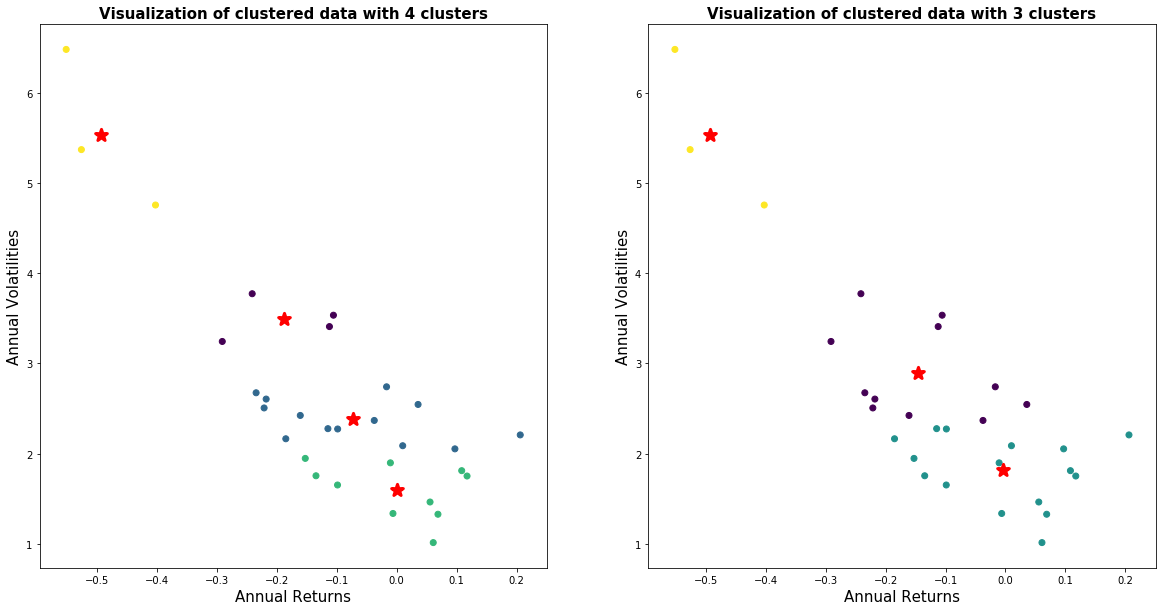

In [17]:
plt.figure(figsize=(20,10))
for cluster in [4,3]:
    plt.subplot(1,2,cluster%2+1)
    plt.scatter(clustering_data.Returns, clustering_data.Volatilities, c=diff_cluster_result.cluster_label[cluster], cmap='viridis')
    plt.scatter(diff_cluster_result.center_returns[cluster], diff_cluster_result.center_volatility[cluster], marker='*', c='r', s=150, linewidth=3)
    plt.ylabel('Annual Volatilities', fontsize=15)
    plt.xlabel('Annual Returns', fontsize=15)
    plt.title('Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold', fontsize=15)
plt.show()

**So from above comparsion, 4 clustered scatter plot look much better than 3 clustered.**

### Optimum Number of clusters =  4

In [18]:
k_optimized = 4
kmeans_optimized = diff_cluster_result.loc[k_optimized]

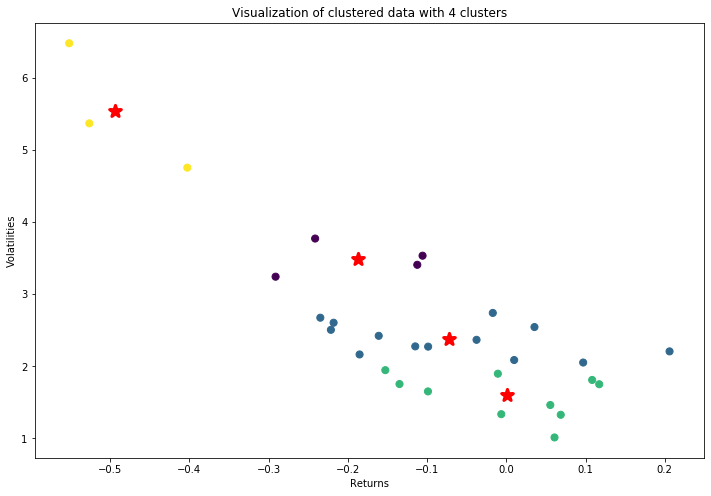

In [19]:
clustering_data.plot(kind='scatter', x='Returns', y='Volatilities', 
                     c=kmeans_optimized.cluster_label, s=50, 
                     cmap='viridis', colorbar=False, figsize=(12,8), 
                     title='Visualization of clustered data with {} clusters'.format(k_optimized))
plt.scatter(kmeans_optimized.center_returns, kmeans_optimized.center_volatility, marker='*', c='r', s=150, linewidths=3)
plt.show()

## <a id="id4">Problem Statement 6.4</a>
Prepare a separate Data frame to show which stocks belong to the same cluster
<img src="https://www.aspiration.link/machine-learning/internship/images/16.png" alt="Drawing" style="width: 700px;" align="left"/>

#### Label of Stocks in Clusters

In [20]:
# Add Cluster number label in Clustering_data dataframe
clustering_data['label'] = diff_cluster_result.cluster_label[k_optimized].astype(int)+1

#  separate Data frame to show which stocks belong to the same cluster 
all_clusters = [i[1] for i in clustering_data.groupby('label')]
cluster1, cluster2, cluster3, cluster4 = all_clusters

# Display which stocks belongs to which cluster
print("STOCKS IN", "-"*50,sep='\n')
for cluster in all_clusters:
    print(f"Cluster {cluster.label[0]} : ",end=""); print(*cluster.index.values, sep=", ",end='\n\n')

STOCKS IN
--------------------------------------------------
Cluster 1 : ASHOKA, INFY, TCS, VENKEYS

Cluster 2 : BAJAJELEC, BAJFINANCE, CENTURYPLY, IDBI, LUXIND, MINDTREE, NBCC, PNB, PVR, RAYMOND, SONATSOFTW, SUNTV, TATAPOWER

Cluster 3 : APOLLOTYRE, ASIANPAINT, HDFCBANK, HEROMOTOCO, HINDUNILVR, LT, MARUTI, RBLBANK, RELIANCE, VOLTAS

Cluster 4 : DHFL, JETAIRWAYS, RCOM



#### Plot Clustering of Stocks

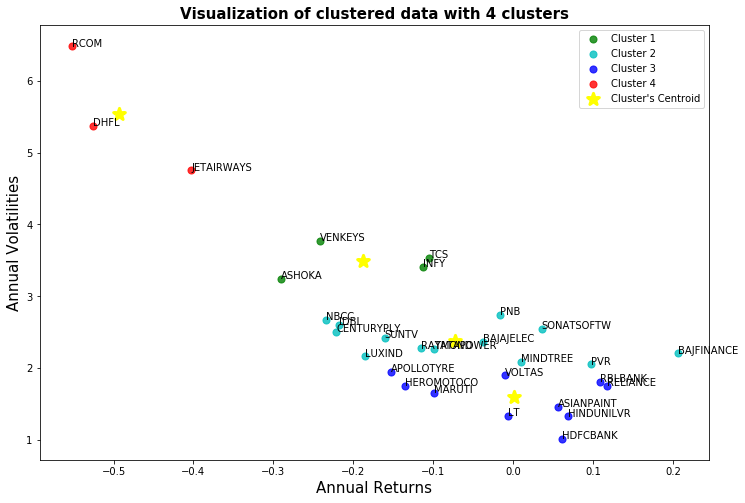

In [21]:
plt.figure(figsize=(12,8))

# Plot all clusters
for i in range(len(all_clusters)):
    plt.scatter(all_clusters[i].Returns, all_clusters[i].Volatilities, s=50, label=f"Cluster {i+1}", c=list('gcbr')[i], alpha=0.8)

# Annotate stock name to each data point
for i in range(len(clustering_data)):
    plt.annotate(clustering_data.index[i], (clustering_data.Returns[i], clustering_data.Volatilities[i]))
    
# Plot Centriod of each cluster
plt.scatter(kmeans_optimized.center_returns, kmeans_optimized.center_volatility, marker='*', c='yellow', s=150, linewidth=3, label="Cluster's Centroid")

plt.title("Visualization of clustered data with 4 clusters", fontweight='bold', fontsize=15)
plt.xlabel("Annual Returns", fontsize=15)
plt.ylabel("Annual Volatilities", fontsize=15)
plt.legend()
plt.show()

#### Separate Data frame of Each Cluster

In [22]:
cluster1

,Returns,Volatilities,label
ASHOKA,-0.291083,3.242312,1
INFY,-0.112286,3.407303,1
TCS,-0.105631,3.533329,1
VENKEYS,-0.241175,3.771359,1


In [23]:
cluster2

,Returns,Volatilities,label
BAJAJELEC,-0.037507,2.367102,2
BAJFINANCE,0.206037,2.206760,2
CENTURYPLY,-0.221293,2.505610,2
IDBI,-0.217885,2.604046,2
LUXIND,-0.185099,2.164111,2
MINDTREE,0.009951,2.086993,2
NBCC,-0.234637,2.673751,2
PNB,-0.016995,2.739882,2
PVR,0.097040,2.052217,2
RAYMOND,-0.114845,2.276097,2


In [24]:
cluster3

,Returns,Volatilities,label
APOLLOTYRE,-0.152627,1.946514,3
ASIANPAINT,0.055553,1.463245,3
HDFCBANK,0.060881,1.013472,3
HEROMOTOCO,-0.134744,1.754052,3
HINDUNILVR,0.068739,1.327639,3
LT,-0.006306,1.336219,3
MARUTI,-0.098799,1.651774,3
RBLBANK,0.108374,1.810614,3
RELIANCE,0.117284,1.751214,3
VOLTAS,-0.010604,1.897297,3


In [25]:
cluster4

,Returns,Volatilities,label
DHFL,-0.526120,5.368415,4
JETAIRWAYS,-0.402479,4.754339,4
RCOM,-0.551513,6.478758,4
